In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

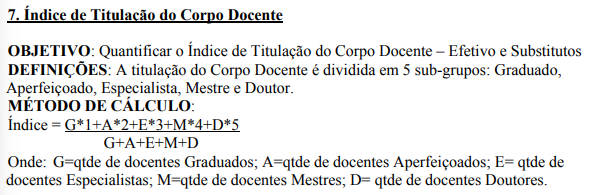

In [ ]:
data = pd.read_csv("/content/QualidadeIES - Página1.csv")

data['IN_TI_CO_DOCENTE'] = data['IN_TI_CO_DOCENTE'].str.replace(',', '.').astype(float)

print("Primeiras linhas do dataset:")
print(data.head())

print("\nInformações gerais sobre o dataset:")
print(data.info())

print("\nEstatísticas descritivas:")
print(data.describe())

print("\nValores nulos por coluna:")
print(data.isnull().sum())


Primeiras linhas do dataset:
   CO_REGIAO_IES  CO_UF_IES  TP_ORGANIZACAO_ACADEMICA  TP_REDE  \
0              5         51                         1        1   
1              5         53                         1        1   
2              2         28                         1        1   
3              1         13                         1        1   
4              2         22                         1        1   

   TP_CATEGORIA_ADMINISTRATIVA  CO_IES  QT_DOC_TOTAL  QT_DOC_EX_SEM_GRAD  \
0                            1       1          1742                   0   
1                            1       2          3120                   0   
2                            1       3          1820                   0   
3                            1       4          2051                   0   
4                            1       5          1693                   2   

   QT_DOC_EX_GRAD  QT_DOC_EX_ESP  QT_DOC_EX_MEST  QT_DOC_EX_DOUT  \
0              83             51             191 

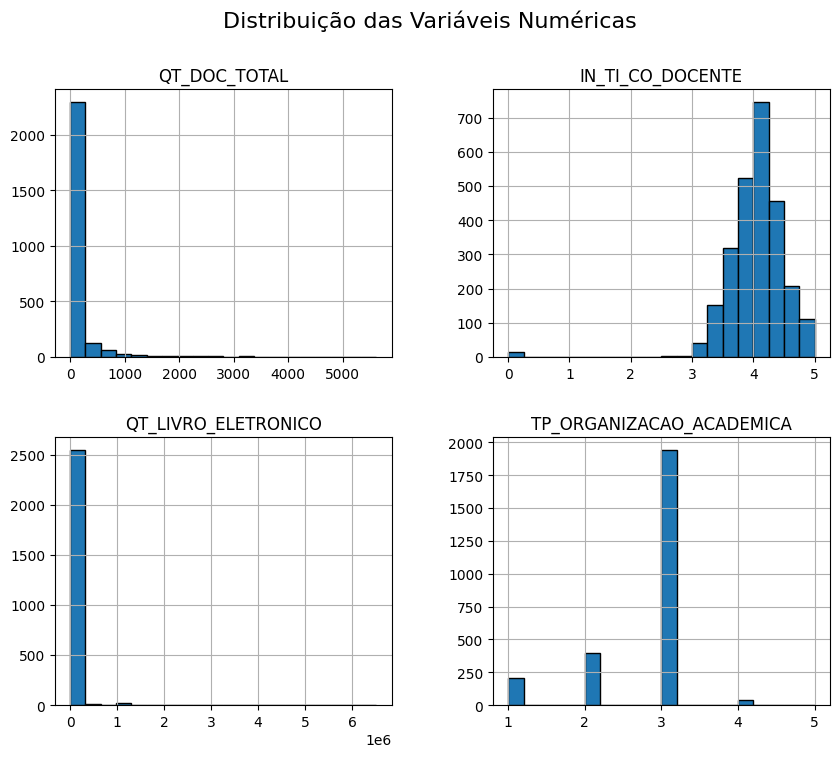

In [ ]:
num_cols = ['QT_DOC_TOTAL','IN_TI_CO_DOCENTE','QT_LIVRO_ELETRONICO']
data[num_cols].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados numéricos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[num_cols])

data_normalized = pd.DataFrame(data_scaled, columns=num_cols)

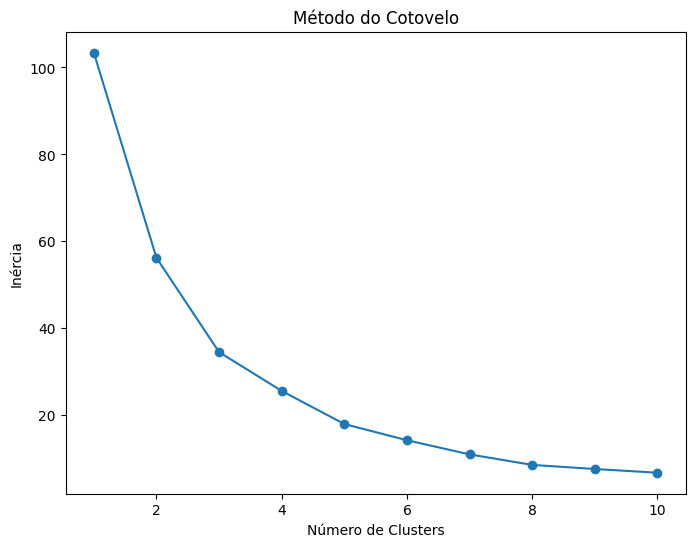

In [ ]:
from sklearn.cluster import KMeans

# Método do cotovelo
inercia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inercia.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inercia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


[1 1 1 ... 0 0 0]


<ipython-input-7-e5c4512dcc6e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Cluster'], palette='viridis')


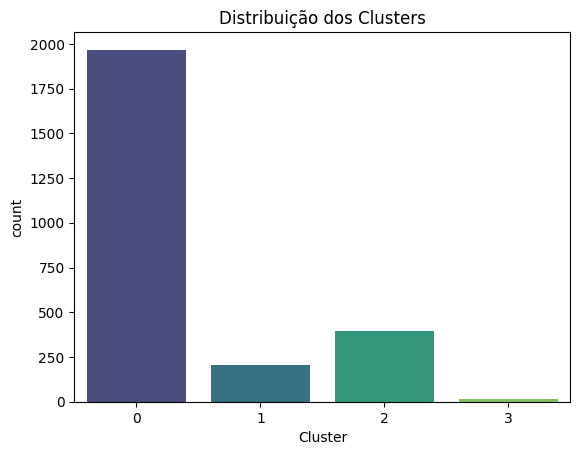

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

data['Cluster'] = clusters

print(clusters)

# Visualizar a distribuição dos clusters
sns.countplot(x=data['Cluster'], palette='viridis')
plt.title('Distribuição dos Clusters')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhueta = silhouette_score(data_normalized, clusters)
print(f"Índice de Silhueta: {silhueta}")


NameError: name 'data_normalized' is not defined

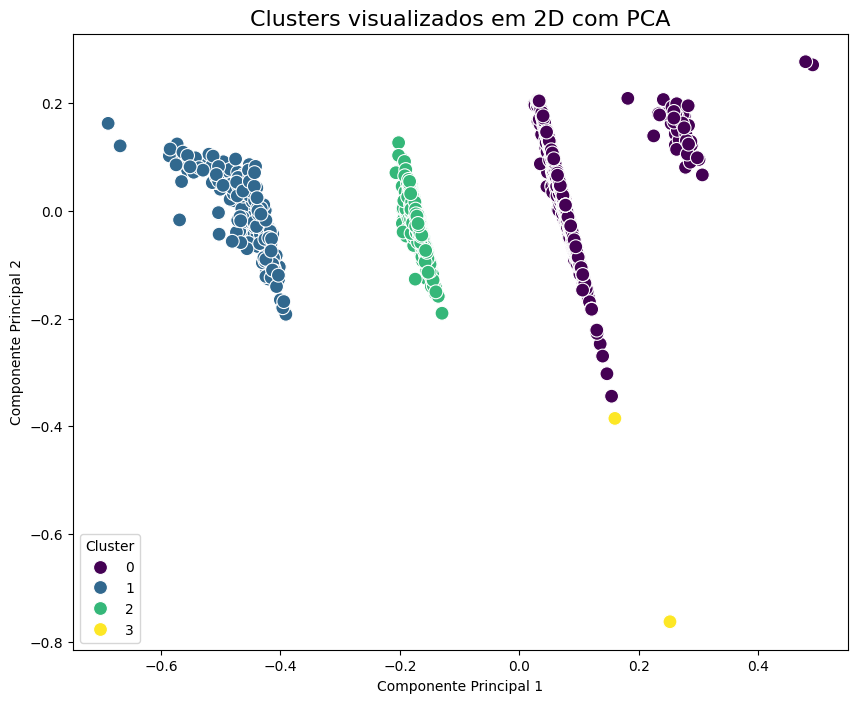

In [ ]:
from sklearn.decomposition import PCA

# Reduzir os dados para 2 dimensões
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Criar um DataFrame com as dimensões reduzidas e os clusters
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']

# Visualizar os clusters em 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters visualizados em 2D com PCA', fontsize=16)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='best')
plt.show()


In [ ]:
doc_cont = data.groupby('Cluster')['IN_TI_CO_DOCENTE'].mean()
doc_cont

,IN_TI_CO_DOCENTE
Cluster,
0,4.001410
1,4.465856
2,4.085752
3,0.129341


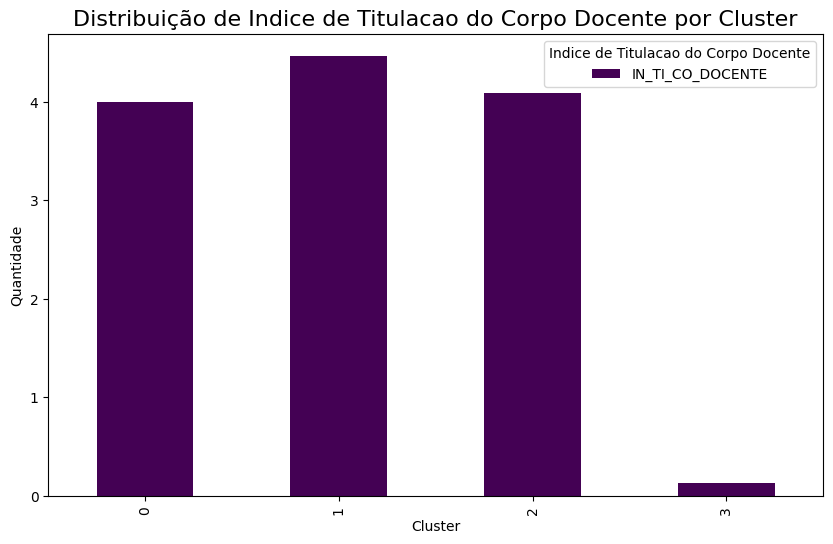

In [ ]:
doc_cont.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuição de Indice de Titulacao do Corpo Docente por Cluster', fontsize=16)
plt.ylabel('Quantidade')
plt.xlabel('Cluster')
plt.legend(title='Indice de Titulacao do Corpo Docente')
plt.show()

In [ ]:
livro_cont = data.groupby('Cluster')['QT_LIVRO_ELETRONICO'].mean()
livro_cont

,QT_LIVRO_ELETRONICO
Cluster,
0,43463.113371
1,48231.736585
2,42181.926209
3,11799.200000


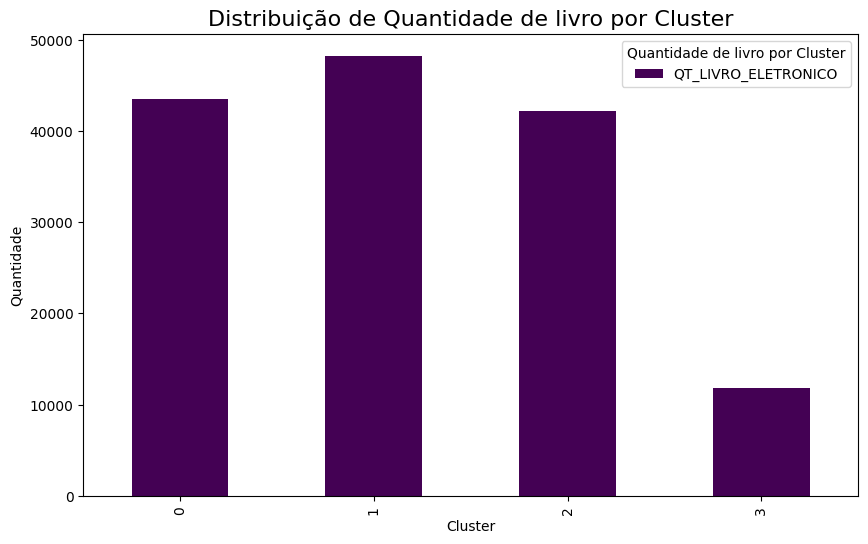

In [ ]:
livro_cont.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuição de Quantidade de livro por Cluster', fontsize=16)
plt.ylabel('Quantidade')
plt.xlabel('Cluster')
plt.legend(title='Quantidade de livro por Cluster')
plt.show()

In [ ]:
org_cont = data.groupby('Cluster')['TP_ORGANIZACAO_ACADEMICA'].mean()
org_cont

,TP_ORGANIZACAO_ACADEMICA
Cluster,
0,3.021861
1,1.000000
2,2.000000
3,3.000000


In [ ]:
cluster_0_data = data[data['Cluster'] == 0]
print(cluster_0_data.describe())

       CO_REGIAO_IES    CO_UF_IES  TP_ORGANIZACAO_ACADEMICA      TP_REDE  \
count    1967.000000  1967.000000               1967.000000  1967.000000   
mean        2.987799    33.382816                  3.021861     1.903406   
std         1.072572     9.846243                  0.153063     0.295479   
min         1.000000    11.000000                  3.000000     1.000000   
25%         2.000000    28.000000                  3.000000     2.000000   
50%         3.000000    33.000000                  3.000000     2.000000   
75%         4.000000    41.000000                  3.000000     2.000000   
max         5.000000    53.000000                  5.000000     2.000000   

       TP_CATEGORIA_ADMINISTRATIVA        CO_IES  QT_DOC_TOTAL  \
count                  1967.000000   1967.000000   1967.000000   
mean                      4.136248  10974.795628     57.088968   
std                       0.895190   9210.850759    125.394258   
min                       1.000000     26.000000   

In [ ]:
print("Moda por variável no Cluster 0:")
print(cluster_0_data.mode().iloc[0])

Moda por variável no Cluster 0:
CO_REGIAO_IES                    3.0
CO_UF_IES                       35.0
TP_ORGANIZACAO_ACADEMICA         3.0
TP_REDE                          2.0
TP_CATEGORIA_ADMINISTRATIVA      4.0
CO_IES                          26.0
QT_DOC_TOTAL                     6.0
QT_DOC_EX_SEM_GRAD               0.0
QT_DOC_EX_GRAD                   0.0
QT_DOC_EX_ESP                    0.0
QT_DOC_EX_MEST                   3.0
QT_DOC_EX_DOUT                   1.0
IN_TI_CO_DOCENTE                 4.0
IN_ACESSO_PORTAL_CAPES           0.0
IN_REPOSITORIO_INSTITUCIONAL     1.0
IN_SERVICO_INTERNET              1.0
QT_PERIODICO_ELETRONICO          0.0
QT_LIVRO_ELETRONICO              0.0
Cluster                          0.0
Name: 0, dtype: float64


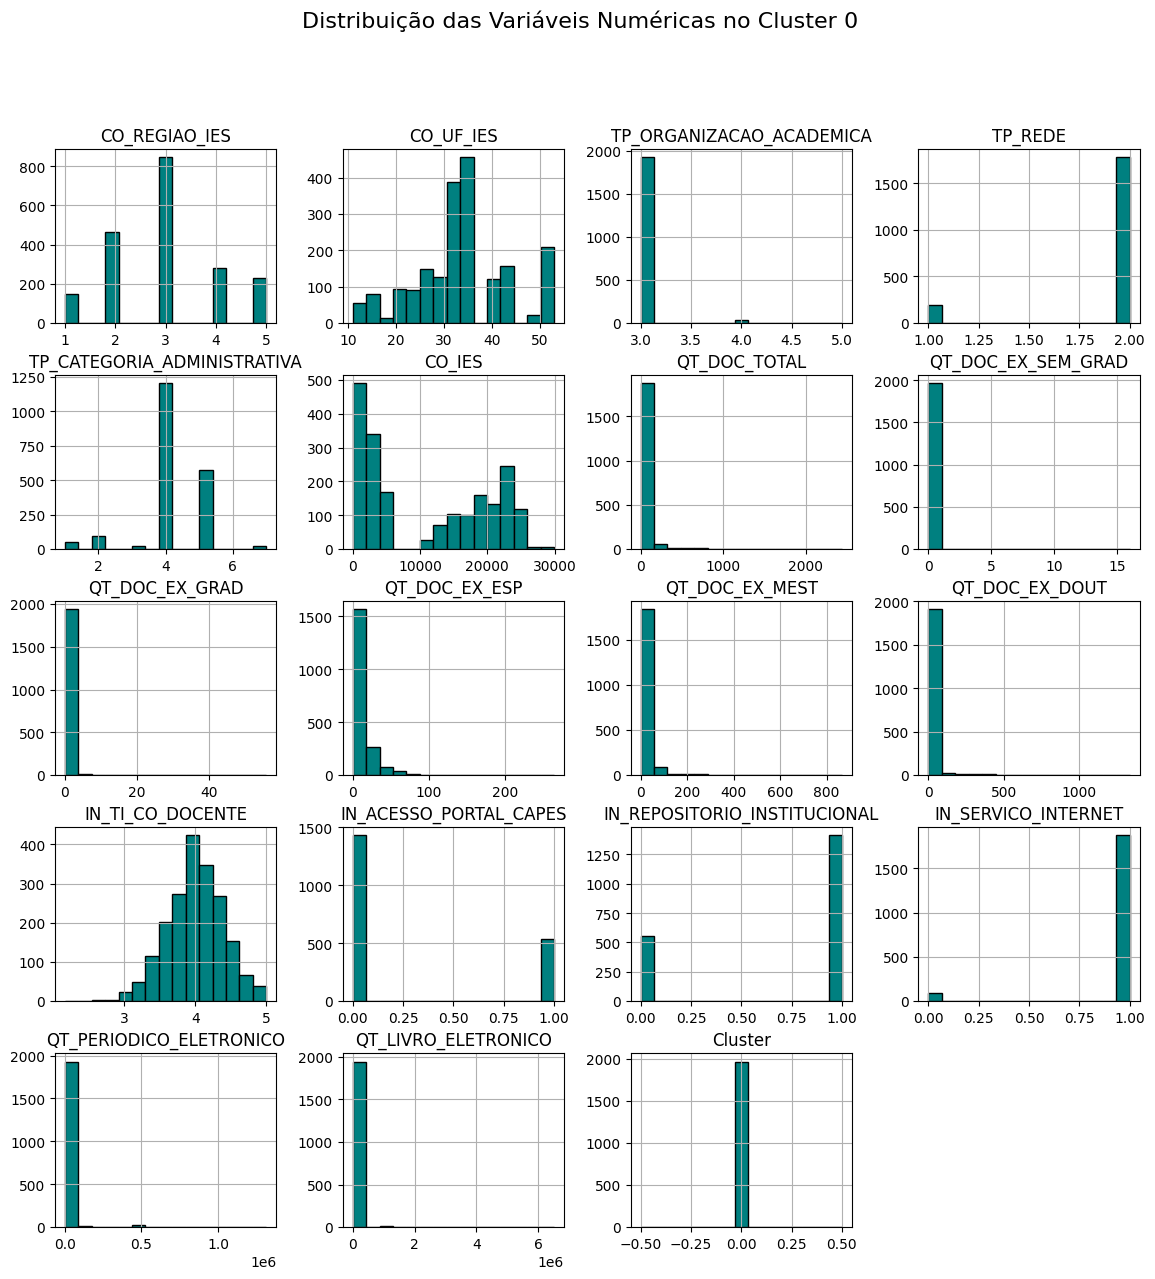

In [ ]:
cluster_0_data.hist(figsize=(14, 14), bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas no Cluster 0', fontsize=16)
plt.show()

In [ ]:
cluster_1_data = data[data['Cluster'] == 1]
print(cluster_1_data.describe())

In [ ]:
print("Moda por variável no Cluster 1:")
print(cluster_1_data.mode().iloc[0])

Moda por variável no Cluster 1:
CO_REGIAO_IES                     3.0
CO_UF_IES                        35.0
TP_ORGANIZACAO_ACADEMICA          1.0
TP_REDE                           1.0
TP_CATEGORIA_ADMINISTRATIVA       1.0
CO_IES                            1.0
QT_DOC_TOTAL                    250.0
QT_DOC_EX_SEM_GRAD                0.0
QT_DOC_EX_GRAD                    0.0
QT_DOC_EX_ESP                     0.0
QT_DOC_EX_MEST                  109.0
QT_DOC_EX_DOUT                  110.0
IN_TI_CO_DOCENTE                  5.0
IN_ACESSO_PORTAL_CAPES            1.0
IN_REPOSITORIO_INSTITUCIONAL      1.0
IN_SERVICO_INTERNET               1.0
QT_PERIODICO_ELETRONICO           0.0
QT_LIVRO_ELETRONICO               0.0
Cluster                           1.0
Name: 0, dtype: float64


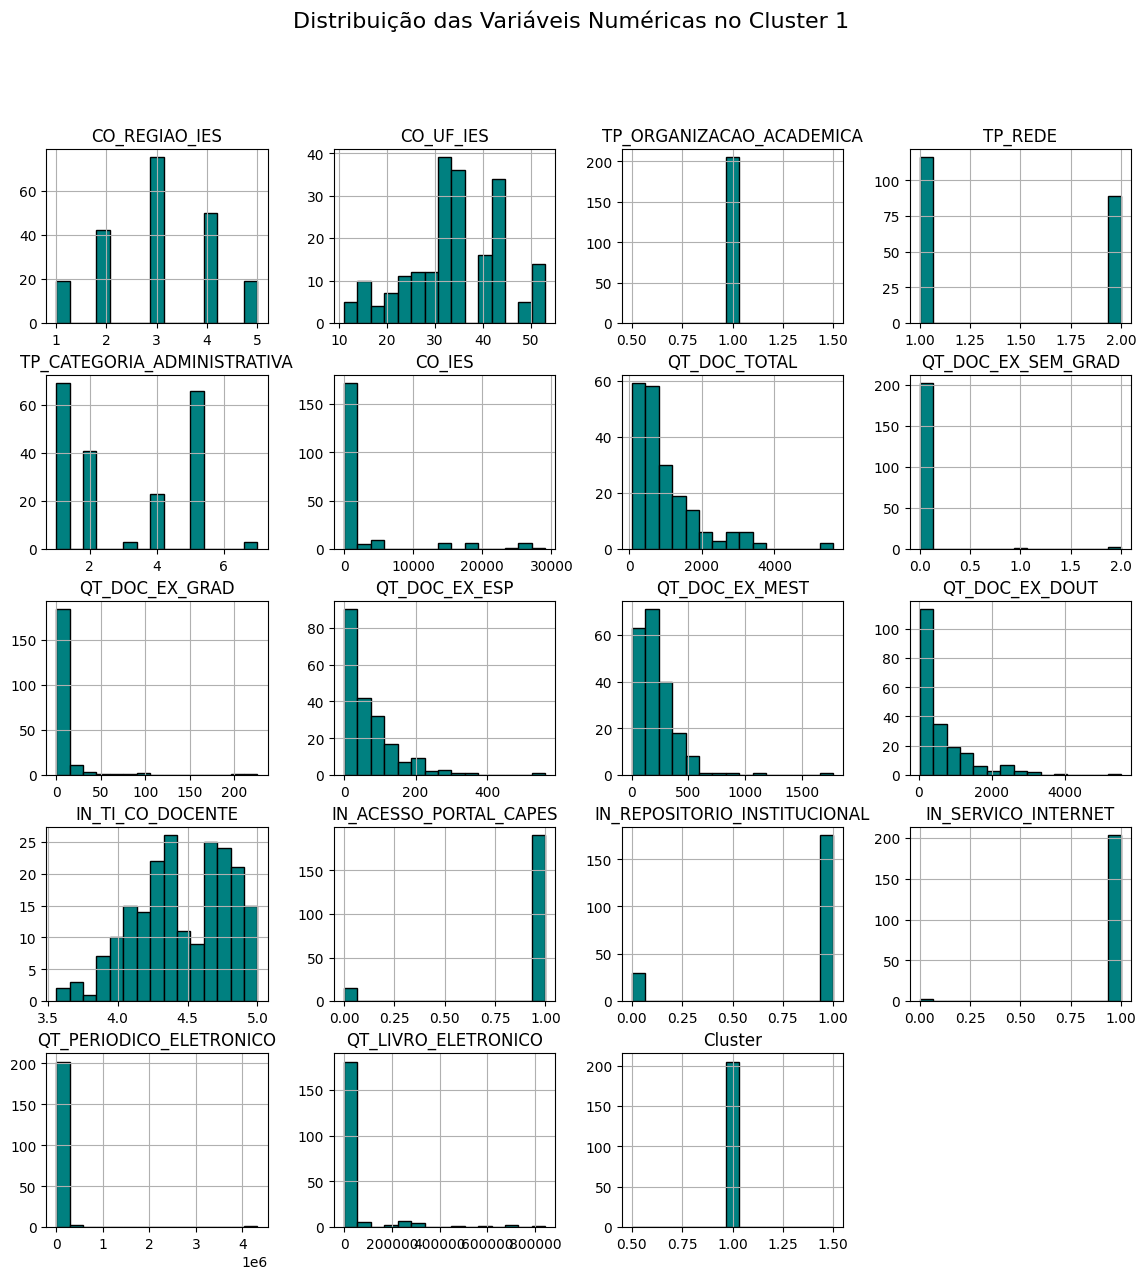

In [ ]:
cluster_1_data.hist(figsize=(14, 14), bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas no Cluster 1', fontsize=16)
plt.show()

In [ ]:
cluster_2_data = data[data['Cluster'] == 2]
print(cluster_2_data.describe())

       CO_REGIAO_IES   CO_UF_IES  TP_ORGANIZACAO_ACADEMICA     TP_REDE  \
count     393.000000  393.000000                     393.0  393.000000   
mean        3.002545   33.541985                       2.0    1.977099   
std         1.041238    9.554297                       0.0    0.149778   
min         1.000000   11.000000                       2.0    1.000000   
25%         2.000000   29.000000                       2.0    2.000000   
50%         3.000000   35.000000                       2.0    2.000000   
75%         4.000000   41.000000                       2.0    2.000000   
max         5.000000   53.000000                       2.0    2.000000   

       TP_CATEGORIA_ADMINISTRATIVA        CO_IES  QT_DOC_TOTAL  \
count                   393.000000    393.000000    393.000000   
mean                      4.391858   2567.287532    168.608142   
std                       0.601134   3235.526283    129.843898   
min                       1.000000     27.000000      2.000000   
25%

In [ ]:
print("Moda por variável no Cluster 2:")
print(cluster_2_data.mode().iloc[0])

Moda por variável no Cluster 2:
CO_REGIAO_IES                       3.0
CO_UF_IES                          35.0
TP_ORGANIZACAO_ACADEMICA            2.0
TP_REDE                             2.0
TP_CATEGORIA_ADMINISTRATIVA         4.0
CO_IES                             27.0
QT_DOC_TOTAL                      117.0
QT_DOC_EX_SEM_GRAD                  0.0
QT_DOC_EX_GRAD                      0.0
QT_DOC_EX_ESP                       0.0
QT_DOC_EX_MEST                     42.0
QT_DOC_EX_DOUT                     19.0
IN_TI_CO_DOCENTE                    4.0
IN_ACESSO_PORTAL_CAPES              0.0
IN_REPOSITORIO_INSTITUCIONAL        1.0
IN_SERVICO_INTERNET                 1.0
QT_PERIODICO_ELETRONICO             0.0
QT_LIVRO_ELETRONICO             25000.0
Cluster                             2.0
Name: 0, dtype: float64


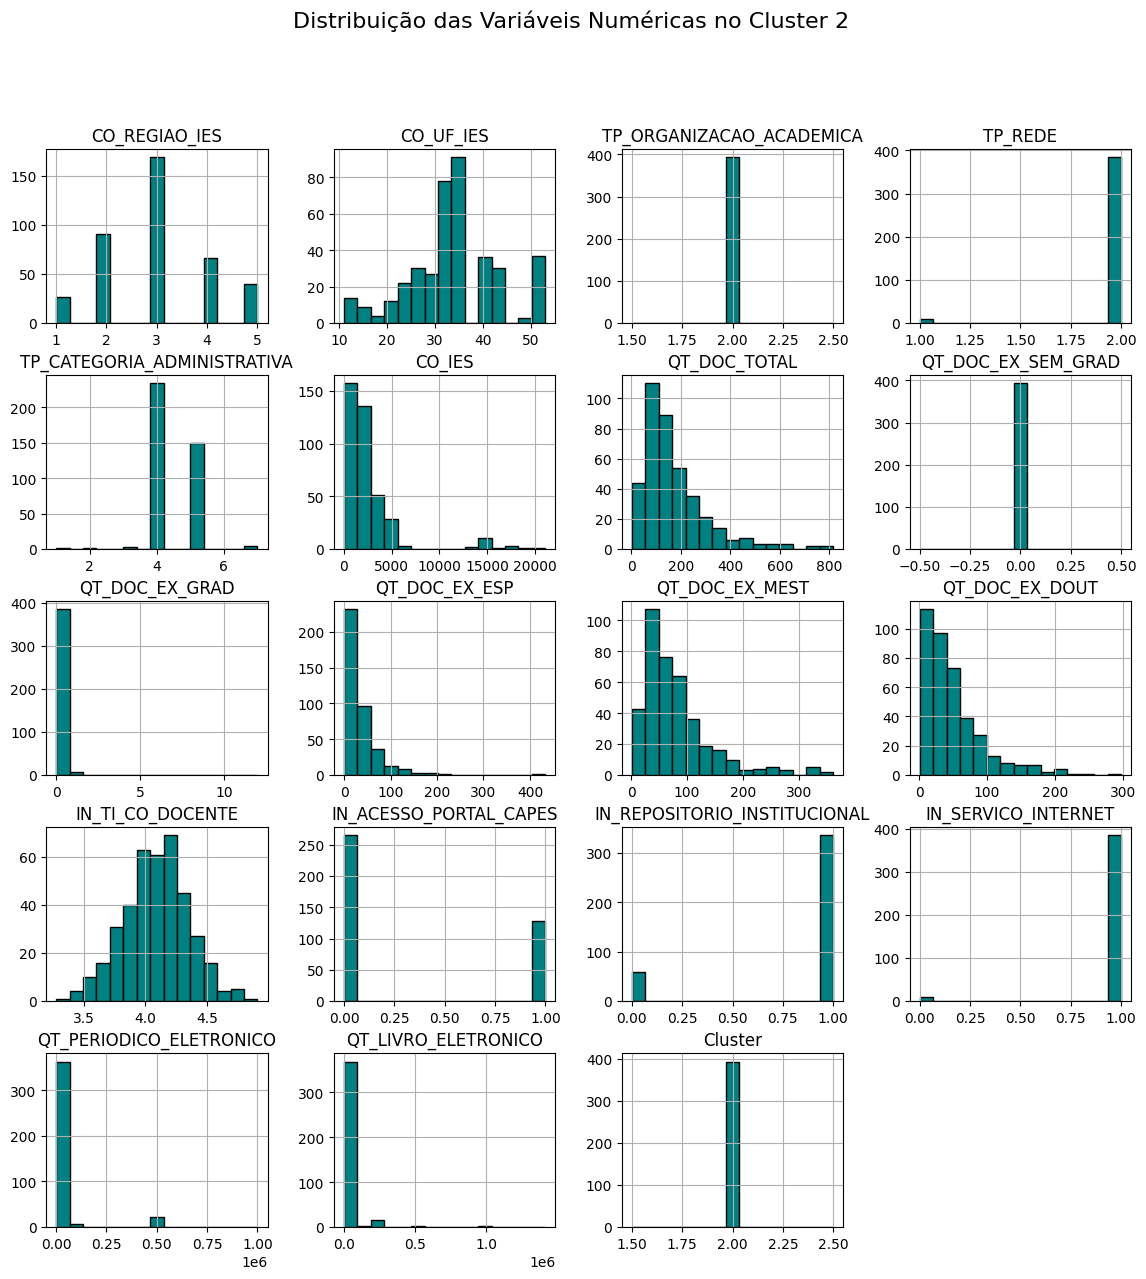

In [ ]:
cluster_2_data.hist(figsize=(14, 14), bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas no Cluster 2', fontsize=16)
plt.show()

In [ ]:
cluster_3_data = data[data['Cluster'] == 3]
print(cluster_3_data.describe())

       CO_REGIAO_IES  CO_UF_IES  TP_ORGANIZACAO_ACADEMICA    TP_REDE  \
count      15.000000  15.000000                      15.0  15.000000   
mean        2.533333  30.466667                       3.0   1.933333   
std         0.990430   8.895157                       0.0   0.258199   
min         1.000000  15.000000                       3.0   1.000000   
25%         2.000000  25.000000                       3.0   2.000000   
50%         2.000000  29.000000                       3.0   2.000000   
75%         3.000000  35.000000                       3.0   2.000000   
max         5.000000  52.000000                       3.0   2.000000   

       TP_CATEGORIA_ADMINISTRATIVA        CO_IES  QT_DOC_TOTAL  \
count                    15.000000     15.000000     15.000000   
mean                      3.866667  20052.333333     13.733333   
std                       0.833809   5626.359336     42.715783   
min                       1.000000   4443.000000      0.000000   
25%                  

In [ ]:
print("Moda por variável no Cluster 3:")
print(cluster_3_data.mode().iloc[0])

Moda por variável no Cluster 3:
CO_REGIAO_IES                       2.0
CO_UF_IES                          29.0
TP_ORGANIZACAO_ACADEMICA            3.0
TP_REDE                             2.0
TP_CATEGORIA_ADMINISTRATIVA         4.0
CO_IES                           4443.0
QT_DOC_TOTAL                        4.0
QT_DOC_EX_SEM_GRAD                  0.0
QT_DOC_EX_GRAD                      0.0
QT_DOC_EX_ESP                       0.0
QT_DOC_EX_MEST                      0.0
QT_DOC_EX_DOUT                      0.0
IN_TI_CO_DOCENTE                    0.0
IN_ACESSO_PORTAL_CAPES              0.0
IN_REPOSITORIO_INSTITUCIONAL        1.0
IN_SERVICO_INTERNET                 1.0
QT_PERIODICO_ELETRONICO         31000.0
QT_LIVRO_ELETRONICO             20000.0
Cluster                             3.0
Name: 0, dtype: float64


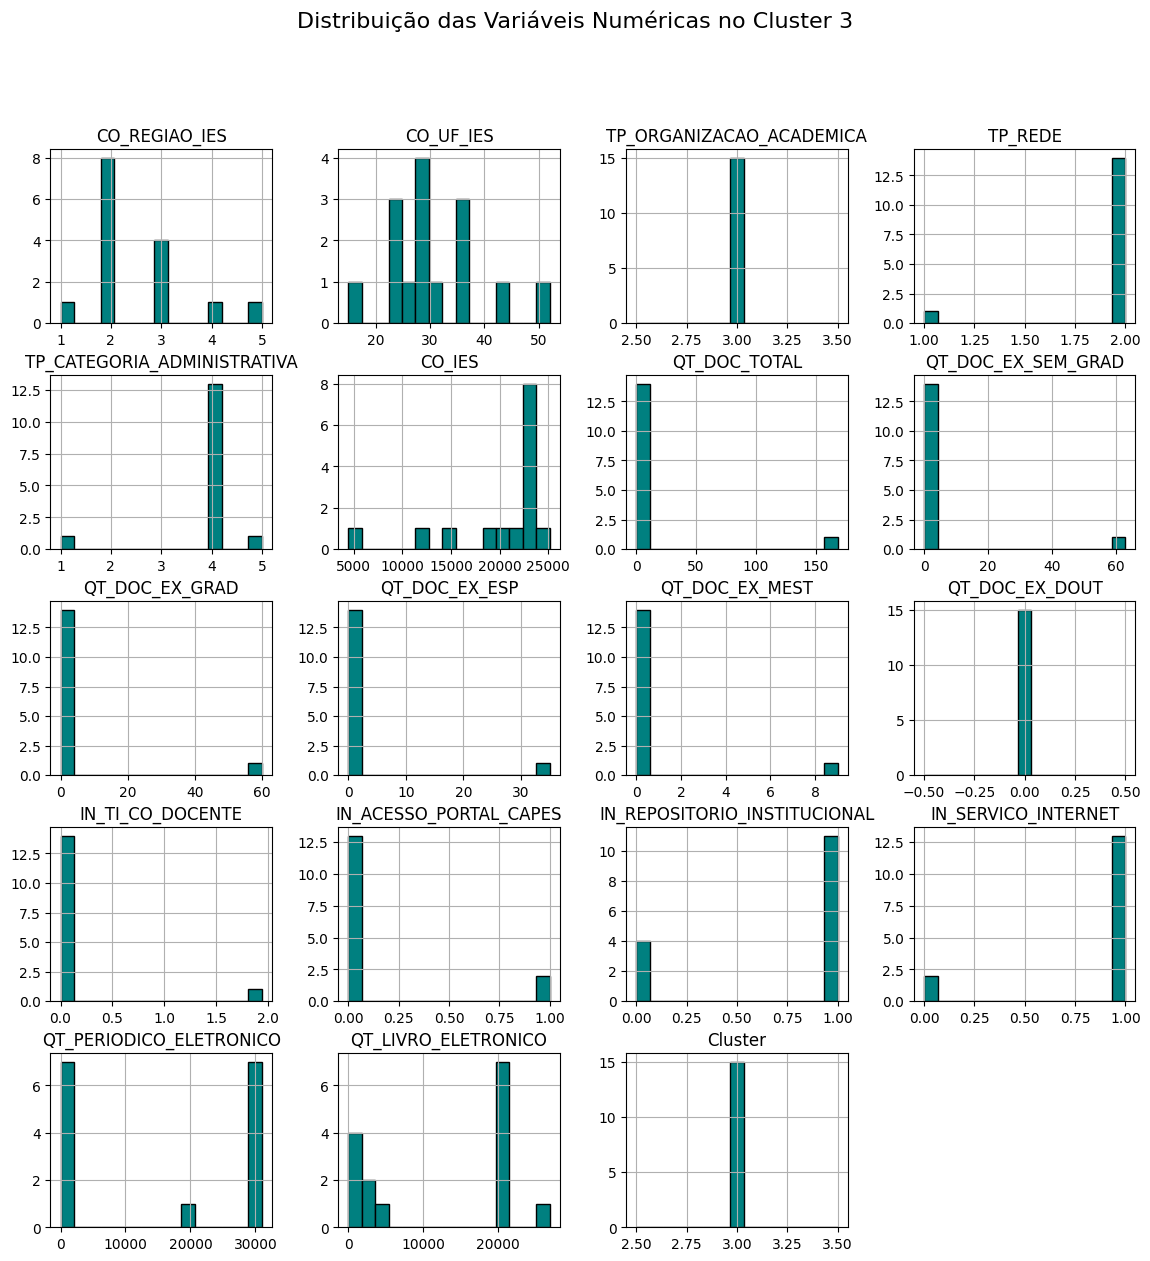

In [ ]:
cluster_3_data.hist(figsize=(14, 14), bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas no Cluster 3', fontsize=16)
plt.show()


In [ ]:
!pip install minisom
from minisom import MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=f609afae48a193b2487186a7202e56dc57b4ad0821b05ec423dd2d2973708121
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


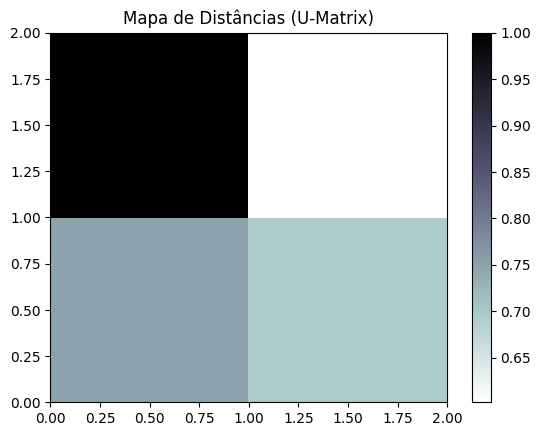

In [ ]:
# Configurar e treinar o SOM
data_array = data_normalized.to_numpy()
som = MiniSom(x=2, y=2, input_len=len(num_cols), sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(data_array)
som.train_random(data_array, num_iteration=100000)

# Visualizar os resultados (exemplo com erros de quantização)
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Mapa de distâncias
plt.colorbar()
plt.title('Mapa de Distâncias (U-Matrix)')
plt.show()


In [ ]:
quantization_error = som.quantization_error(data_array)
print(f"Erro de Quantização: {quantization_error}")

Erro de Quantização: 0.06639108743412042


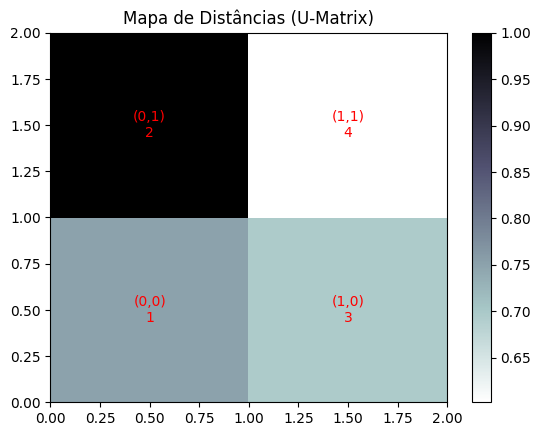

In [ ]:
# Exibir o mapa de distâncias
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('Mapa de Distâncias (U-Matrix)')

# Adicionar rótulos com a numeração dos neurônios
for x in range(2):  # Dimensão x
    for y in range(2):  # Dimensão y
        plt.text(x + 0.5, y + 0.5, f'({x},{y})\n{(x*2 + y + 1)}',
                 ha='center', va='center', color='red')
plt.show()

In [ ]:
# Mapear os dados para os neurônios e adicionar ao dataframe
dataSom = pd.read_csv("/content/QualidadeIES - Página1.csv")

dataSom['IN_TI_CO_DOCENTE'] = dataSom['IN_TI_CO_DOCENTE'].str.replace(',', '.').astype(float)

som_mapping = []
grid_columns = 2  # Número de colunas do grid SOM (x=2, y=2)

for sample in data_array:
    bmu = som.winner(sample)  # Coordenadas do BMU (x, y)
    neuron_id = bmu[0] * grid_columns + bmu[1] + 1  # Converter para número 1, 2, 3, 4
    som_mapping.append(neuron_id)

# Adicionar a coluna 'som' ao dataframe original
dataSom["Som"] = som_mapping

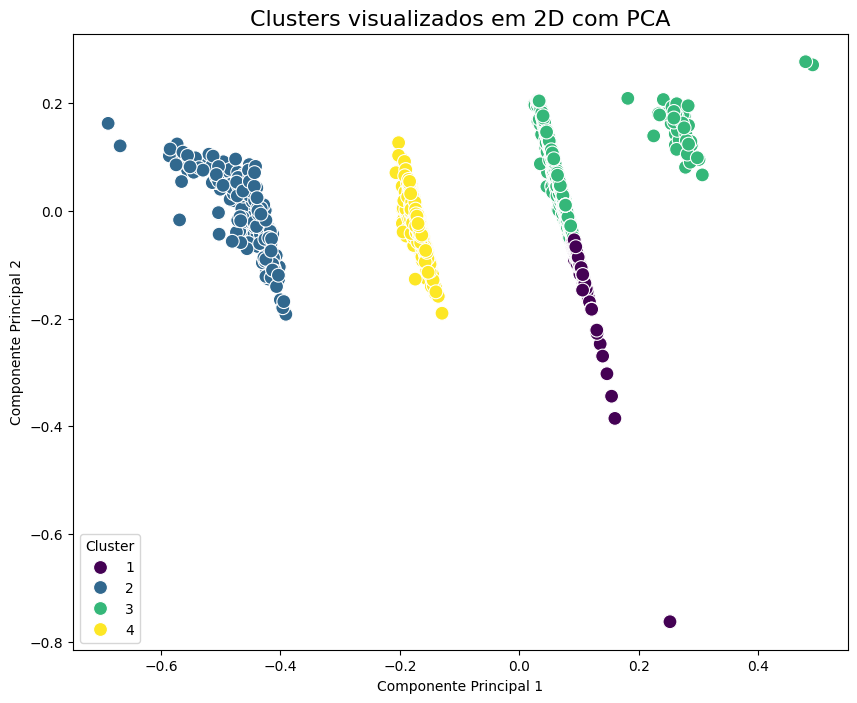

In [ ]:
# Reduzir os dados para 2 dimensões
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Criar um DataFrame com as dimensões reduzidas e os clusters
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Som'] = dataSom['Som']

# Visualizar os clusters em 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Som', data=pca_df, palette='viridis', s=100)
plt.title('Clusters visualizados em 2D com PCA', fontsize=16)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='best')
plt.show()

       CO_REGIAO_IES   CO_UF_IES  TP_ORGANIZACAO_ACADEMICA     TP_REDE  \
count     411.000000  411.000000                     411.0  411.000000   
mean        2.834550   31.669100                       3.0    1.946472   
std         1.273318   11.878347                       0.0    0.225358   
min         1.000000   11.000000                       3.0    1.000000   
25%         2.000000   23.000000                       3.0    2.000000   
50%         3.000000   31.000000                       3.0    2.000000   
75%         4.000000   41.000000                       3.0    2.000000   
max         5.000000   53.000000                       3.0    2.000000   

       TP_CATEGORIA_ADMINISTRATIVA        CO_IES  QT_DOC_TOTAL  \
count                   411.000000    411.000000    411.000000   
mean                      4.226277  11993.058394     30.433090   
std                       0.742370   9152.105631     32.159849   
min                       1.000000     72.000000      0.000000   
25%

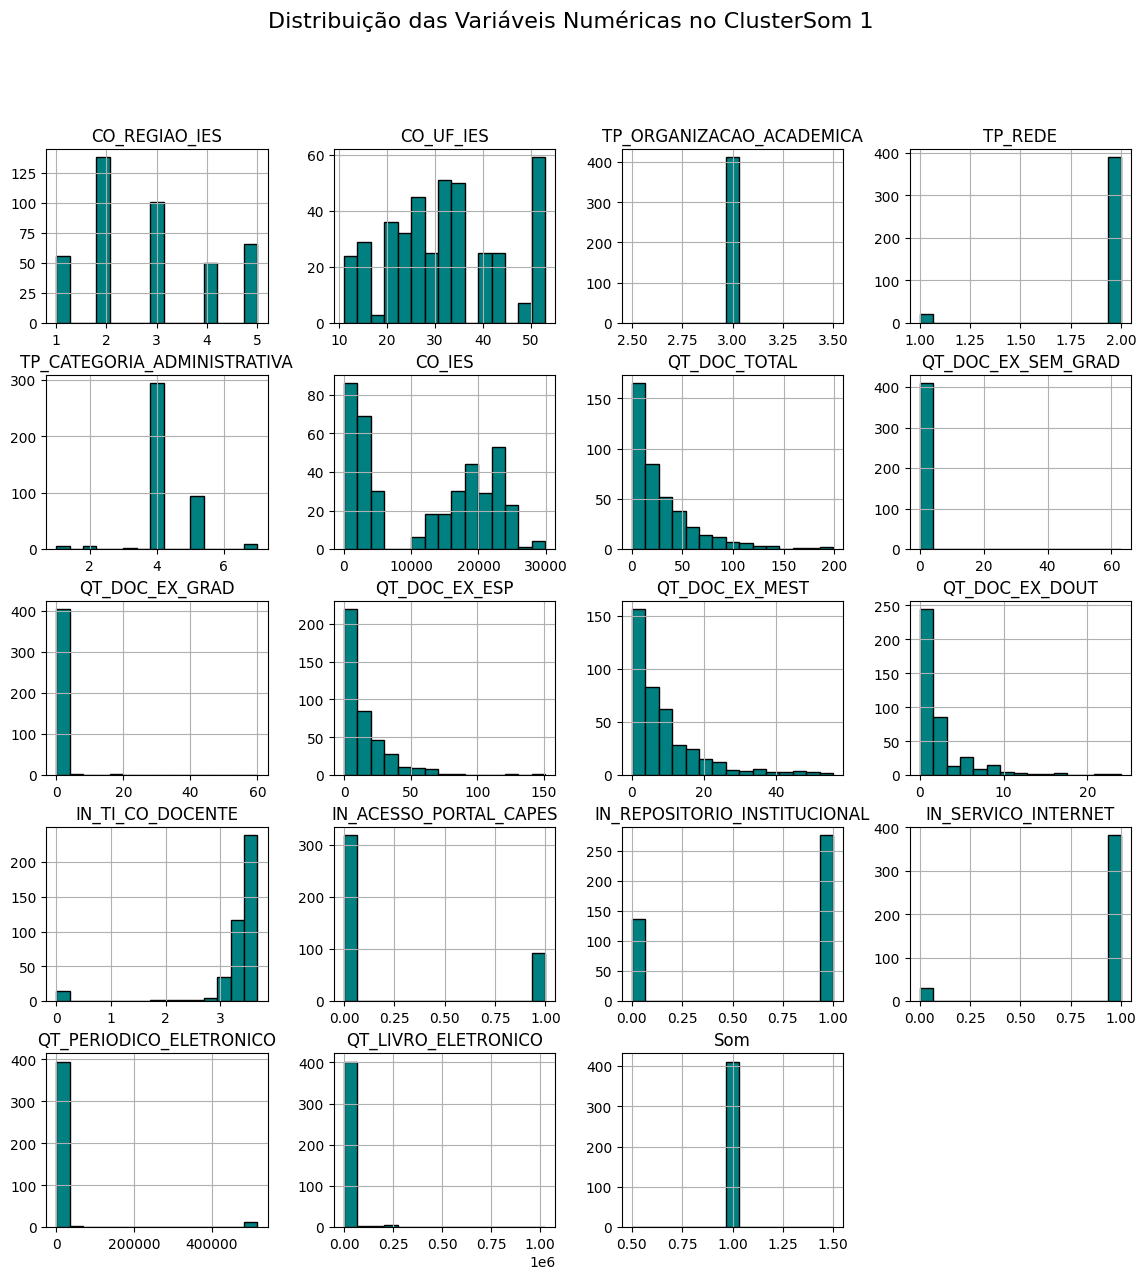

In [ ]:
clusterSom_1_data = dataSom[dataSom['Som'] == 1]
print(clusterSom_1_data.describe())
clusterSom_1_data.hist(figsize=(14, 14), bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas no ClusterSom 1', fontsize=16)
plt.show()

In [ ]:
print("Moda por variável no ClusterSom 1:")
print(clusterSom_1_data.mode().iloc[0])

Moda por variável no ClusterSom 1:
CO_REGIAO_IES                    2.0
CO_UF_IES                       35.0
TP_ORGANIZACAO_ACADEMICA         3.0
TP_REDE                          2.0
TP_CATEGORIA_ADMINISTRATIVA      4.0
CO_IES                          72.0
QT_DOC_TOTAL                     6.0
QT_DOC_EX_SEM_GRAD               0.0
QT_DOC_EX_GRAD                   0.0
QT_DOC_EX_ESP                    3.0
QT_DOC_EX_MEST                   2.0
QT_DOC_EX_DOUT                   0.0
IN_TI_CO_DOCENTE                 3.5
IN_ACESSO_PORTAL_CAPES           0.0
IN_REPOSITORIO_INSTITUCIONAL     1.0
IN_SERVICO_INTERNET              1.0
QT_PERIODICO_ELETRONICO          0.0
QT_LIVRO_ELETRONICO              0.0
Som                              1.0
Name: 0, dtype: float64


       CO_REGIAO_IES   CO_UF_IES  TP_ORGANIZACAO_ACADEMICA     TP_REDE  \
count     205.000000  205.000000                     205.0  205.000000   
mean        3.039024   33.814634                       1.0    1.434146   
std         1.092954    9.875439                       0.0    0.496858   
min         1.000000   11.000000                       1.0    1.000000   
25%         2.000000   29.000000                       1.0    1.000000   
50%         3.000000   35.000000                       1.0    1.000000   
75%         4.000000   42.000000                       1.0    2.000000   
max         5.000000   53.000000                       1.0    2.000000   

       TP_CATEGORIA_ADMINISTRATIVA        CO_IES  QT_DOC_TOTAL  \
count                   205.000000    205.000000    205.000000   
mean                      2.941463   2649.356098    991.965854   
std                       1.786795   6118.539188    903.108392   
min                       1.000000      1.000000     71.000000   
25%

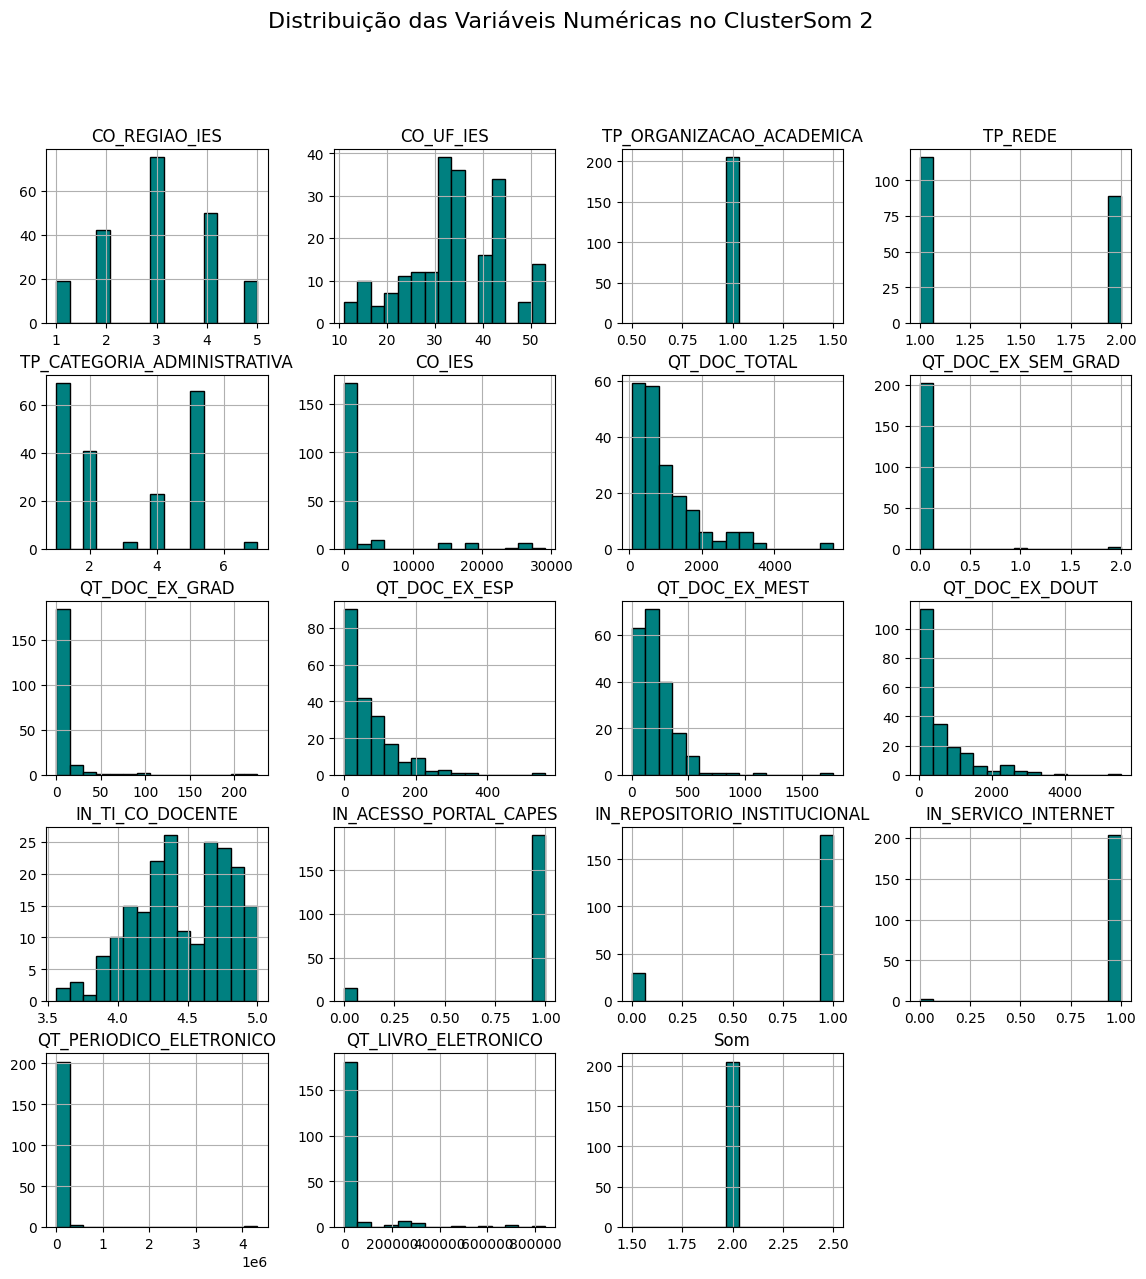

In [ ]:
clusterSom_2_data = dataSom[dataSom['Som'] == 2]
print(clusterSom_2_data.describe())
clusterSom_2_data.hist(figsize=(14, 14), bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas no ClusterSom 2', fontsize=16)
plt.show()

In [ ]:
print("Moda por variável no ClusterSom 2:")
print(clusterSom_2_data.mode().iloc[0])

Moda por variável no ClusterSom 2:
CO_REGIAO_IES                     3.0
CO_UF_IES                        35.0
TP_ORGANIZACAO_ACADEMICA          1.0
TP_REDE                           1.0
TP_CATEGORIA_ADMINISTRATIVA       1.0
CO_IES                            1.0
QT_DOC_TOTAL                    250.0
QT_DOC_EX_SEM_GRAD                0.0
QT_DOC_EX_GRAD                    0.0
QT_DOC_EX_ESP                     0.0
QT_DOC_EX_MEST                  109.0
QT_DOC_EX_DOUT                  110.0
IN_TI_CO_DOCENTE                  5.0
IN_ACESSO_PORTAL_CAPES            1.0
IN_REPOSITORIO_INSTITUCIONAL      1.0
IN_SERVICO_INTERNET               1.0
QT_PERIODICO_ELETRONICO           0.0
QT_LIVRO_ELETRONICO               0.0
Som                               2.0
Name: 0, dtype: float64


       CO_REGIAO_IES    CO_UF_IES  TP_ORGANIZACAO_ACADEMICA      TP_REDE  \
count    1571.000000  1571.000000               1571.000000  1571.000000   
mean        3.023552    33.803310                  3.027371     1.892425   
std         1.010180     9.186747                  0.170841     0.309941   
min         1.000000    11.000000                  3.000000     1.000000   
25%         2.000000    29.000000                  3.000000     2.000000   
50%         3.000000    35.000000                  3.000000     2.000000   
75%         4.000000    41.000000                  3.000000     2.000000   
max         5.000000    53.000000                  5.000000     2.000000   

       TP_CATEGORIA_ADMINISTRATIVA        CO_IES  QT_DOC_TOTAL  \
count                  1571.000000   1571.000000   1571.000000   
mean                      4.110121  10795.073838     63.648631   
std                       0.929334   9226.632795    138.653442   
min                       1.000000     26.000000   

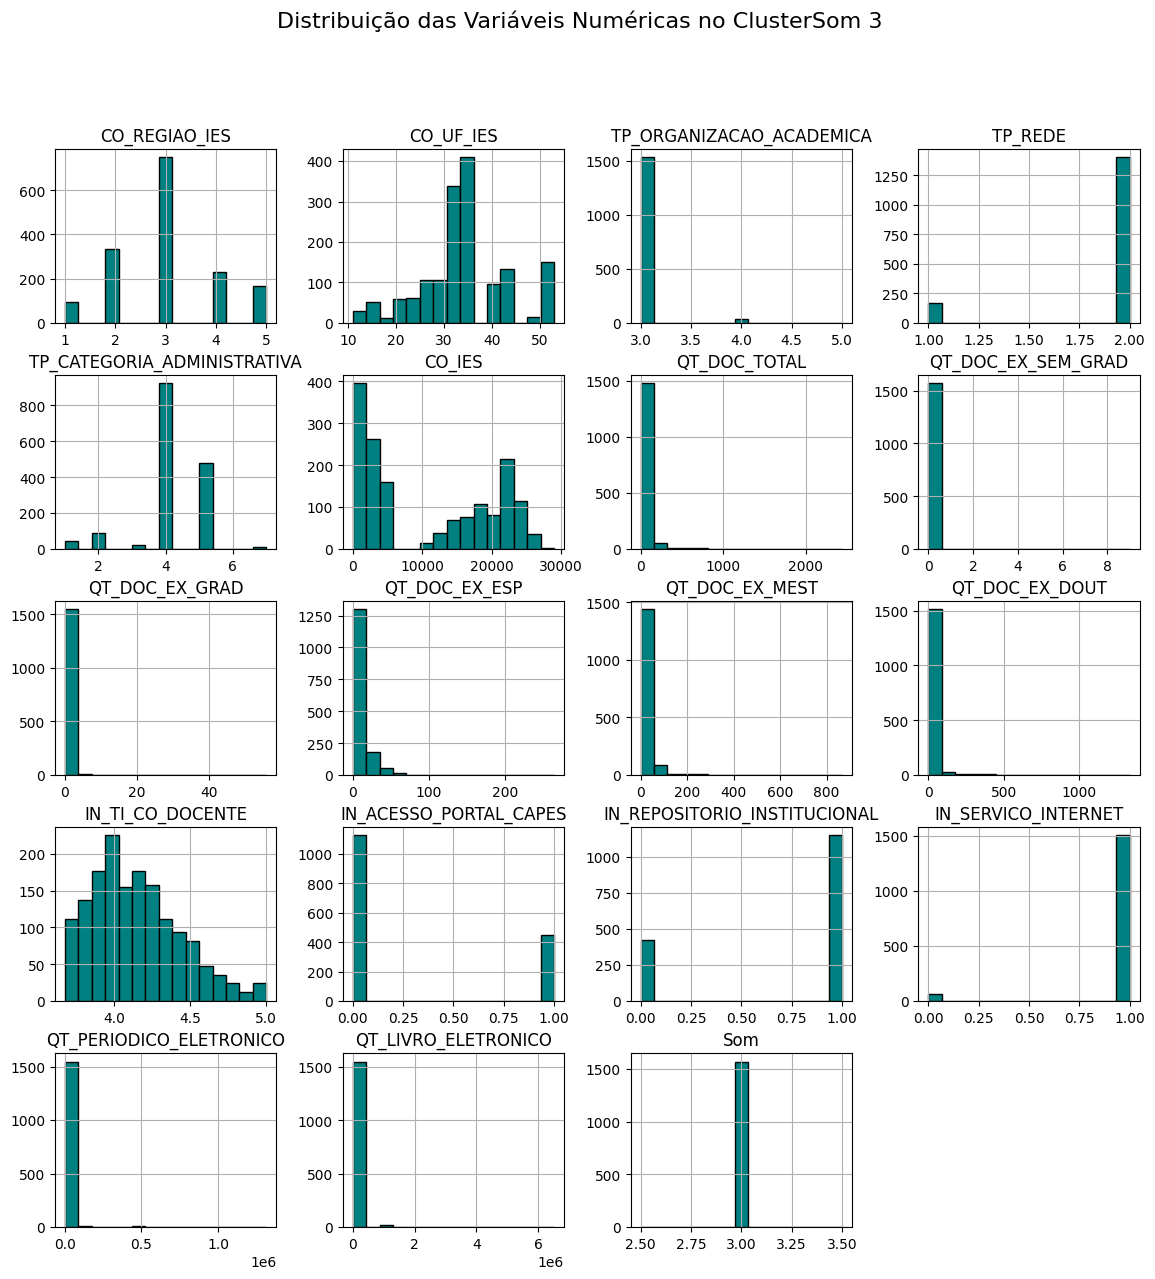

In [ ]:
clusterSom_3_data = dataSom[dataSom['Som'] == 3]
print(clusterSom_3_data.describe())
clusterSom_3_data.hist(figsize=(14, 14), bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas no ClusterSom 3', fontsize=16)
plt.show()

In [ ]:
print("Moda por variável no ClusterSom 3:")
print(clusterSom_3_data.mode().iloc[0])

Moda por variável no ClusterSom 1:
CO_REGIAO_IES                    3.0
CO_UF_IES                       35.0
TP_ORGANIZACAO_ACADEMICA         3.0
TP_REDE                          2.0
TP_CATEGORIA_ADMINISTRATIVA      4.0
CO_IES                          26.0
QT_DOC_TOTAL                     5.0
QT_DOC_EX_SEM_GRAD               0.0
QT_DOC_EX_GRAD                   0.0
QT_DOC_EX_ESP                    0.0
QT_DOC_EX_MEST                   3.0
QT_DOC_EX_DOUT                   2.0
IN_TI_CO_DOCENTE                 4.0
IN_ACESSO_PORTAL_CAPES           0.0
IN_REPOSITORIO_INSTITUCIONAL     1.0
IN_SERVICO_INTERNET              1.0
QT_PERIODICO_ELETRONICO          0.0
QT_LIVRO_ELETRONICO              0.0
Som                              3.0
Name: 0, dtype: float64


       CO_REGIAO_IES   CO_UF_IES  TP_ORGANIZACAO_ACADEMICA     TP_REDE  \
count     393.000000  393.000000                     393.0  393.000000   
mean        3.002545   33.541985                       2.0    1.977099   
std         1.041238    9.554297                       0.0    0.149778   
min         1.000000   11.000000                       2.0    1.000000   
25%         2.000000   29.000000                       2.0    2.000000   
50%         3.000000   35.000000                       2.0    2.000000   
75%         4.000000   41.000000                       2.0    2.000000   
max         5.000000   53.000000                       2.0    2.000000   

       TP_CATEGORIA_ADMINISTRATIVA        CO_IES  QT_DOC_TOTAL  \
count                   393.000000    393.000000    393.000000   
mean                      4.391858   2567.287532    168.608142   
std                       0.601134   3235.526283    129.843898   
min                       1.000000     27.000000      2.000000   
25%

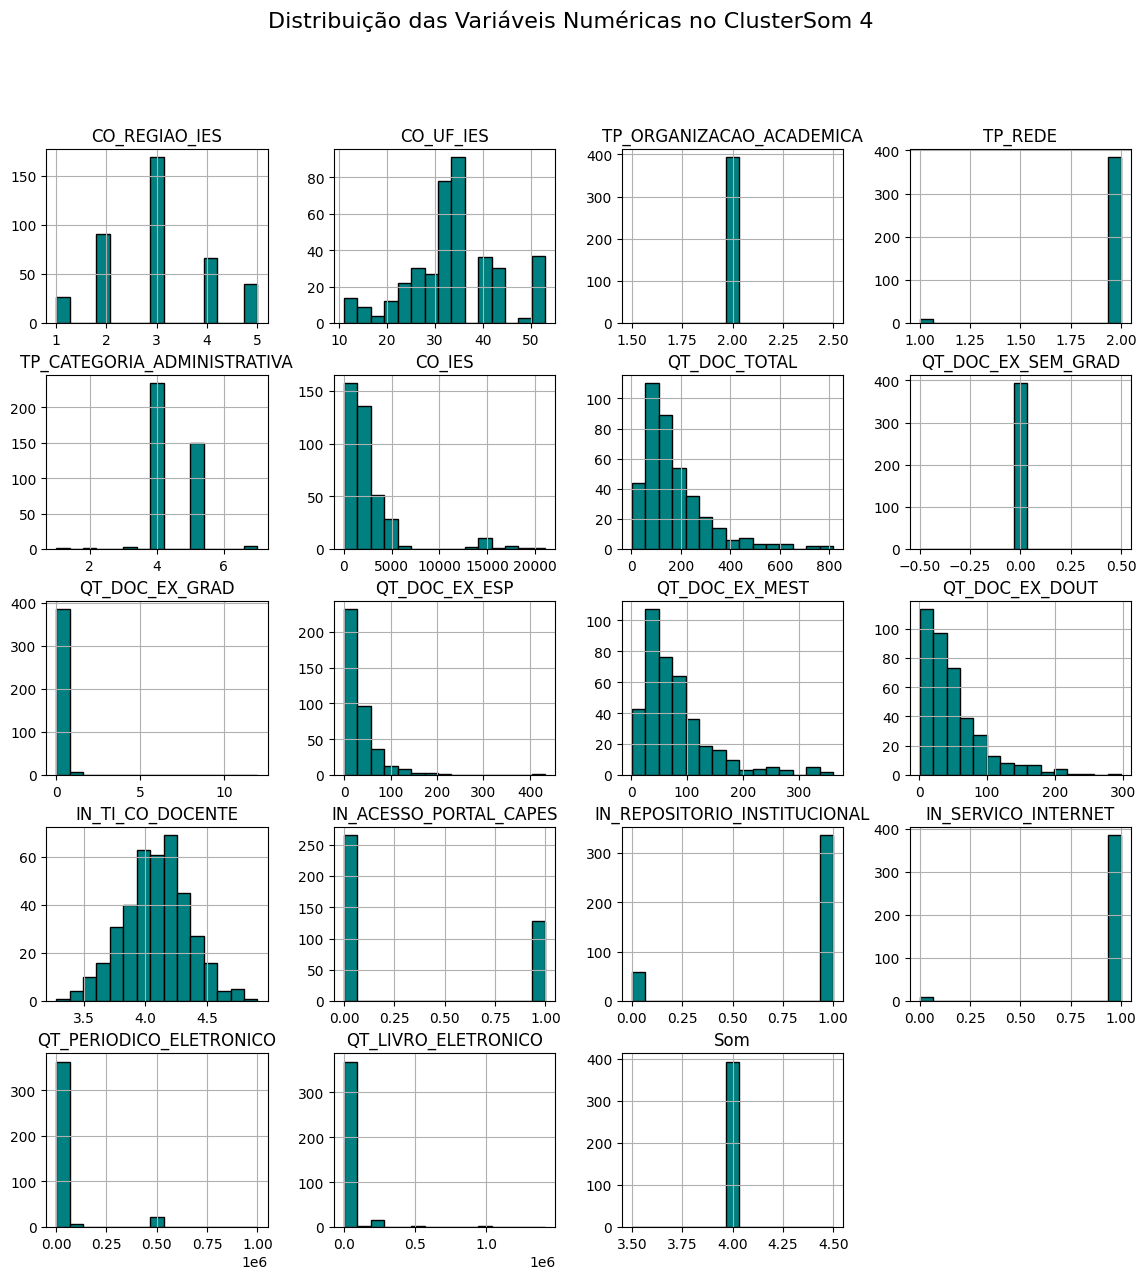

In [ ]:
clusterSom_4_data = dataSom[dataSom['Som'] == 4]
print(clusterSom_4_data.describe())
clusterSom_4_data.hist(figsize=(14, 14), bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas no ClusterSom 4', fontsize=16)
plt.show()

In [ ]:
print("Moda por variável no ClusterSom 4:")
print(clusterSom_4_data.mode().iloc[0])

Moda por variável no ClusterSom 4:
CO_REGIAO_IES                       3.0
CO_UF_IES                          35.0
TP_ORGANIZACAO_ACADEMICA            2.0
TP_REDE                             2.0
TP_CATEGORIA_ADMINISTRATIVA         4.0
CO_IES                             27.0
QT_DOC_TOTAL                      117.0
QT_DOC_EX_SEM_GRAD                  0.0
QT_DOC_EX_GRAD                      0.0
QT_DOC_EX_ESP                       0.0
QT_DOC_EX_MEST                     42.0
QT_DOC_EX_DOUT                     19.0
IN_TI_CO_DOCENTE                    4.0
IN_ACESSO_PORTAL_CAPES              0.0
IN_REPOSITORIO_INSTITUCIONAL        1.0
IN_SERVICO_INTERNET                 1.0
QT_PERIODICO_ELETRONICO             0.0
QT_LIVRO_ELETRONICO             25000.0
Som                                 4.0
Name: 0, dtype: float64
